In [2]:
from fit_model_ import *

### This model is a RNN with Embedding

In [2]:
def define_embed_model(src_vocab,tar_vocab,src_timesteps,tar_timesteps, n_units, g_units,function="softmax"):
    model = Sequential()
    model.add(Embedding(src_vocab, n_units, input_length = src_timesteps,mask_zero=True))
    model.add(GRU(g_units))
    model.add(RepeatVector(tar_timesteps))
    model.add(GRU(g_units, return_sequences=True))
    model.add(TimeDistributed(Dense(tar_vocab, activation=function))) 
    return model

### Variant 1

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 5, 256)            581632    
                                                                 
 gru_10 (GRU)                (None, 128)               148224    
                                                                 
 repeat_vector_5 (RepeatVect  (None, 8, 128)           0         
 or)                                                             
                                                                 
 gru_11 (GRU)                (None, 8, 128)            99072     
                                                                 
 time_distributed_5 (TimeDis  (None, 8, 4510)          581790    
 tributed)                                                       
                                                                 


Epoch 33/100

Epoch 33: val_loss did not improve from 1.98712
125/125 - 14s - loss: 0.8650 - acc: 0.8045 - val_loss: 1.9903 - val_acc: 0.7239 - 14s/epoch - 109ms/step
Epoch 34/100

Epoch 34: val_loss improved from 1.98712 to 1.98402, saving model to Models100\cp_model_2_1.h5
125/125 - 14s - loss: 0.8275 - acc: 0.8104 - val_loss: 1.9840 - val_acc: 0.7266 - 14s/epoch - 115ms/step
Epoch 35/100

Epoch 35: val_loss improved from 1.98402 to 1.97790, saving model to Models100\cp_model_2_1.h5
125/125 - 14s - loss: 0.7925 - acc: 0.8178 - val_loss: 1.9779 - val_acc: 0.7259 - 14s/epoch - 111ms/step
Epoch 36/100

Epoch 36: val_loss did not improve from 1.97790
125/125 - 13s - loss: 0.7574 - acc: 0.8217 - val_loss: 1.9799 - val_acc: 0.7281 - 13s/epoch - 106ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 1.97790
125/125 - 14s - loss: 0.7261 - acc: 0.8296 - val_loss: 1.9791 - val_acc: 0.7269 - 14s/epoch - 109ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 1.97790
125/125 -

Epoch 82/100

Epoch 82: val_loss did not improve from 1.97790
125/125 - 14s - loss: 0.2205 - acc: 0.9086 - val_loss: 2.2060 - val_acc: 0.7247 - 14s/epoch - 109ms/step
Epoch 83/100

Epoch 83: val_loss did not improve from 1.97790
125/125 - 13s - loss: 0.2193 - acc: 0.9083 - val_loss: 2.2158 - val_acc: 0.7272 - 13s/epoch - 108ms/step
Epoch 84/100

Epoch 84: val_loss did not improve from 1.97790
125/125 - 13s - loss: 0.2157 - acc: 0.9082 - val_loss: 2.2158 - val_acc: 0.7267 - 13s/epoch - 106ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 1.97790
125/125 - 13s - loss: 0.2148 - acc: 0.9081 - val_loss: 2.2193 - val_acc: 0.7238 - 13s/epoch - 106ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 1.97790
125/125 - 13s - loss: 0.2133 - acc: 0.9086 - val_loss: 2.2283 - val_acc: 0.7260 - 13s/epoch - 108ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 1.97790
125/125 - 13s - loss: 0.2121 - acc: 0.9077 - val_loss: 2.2257 - val_acc: 0.7253 - 13s/epoch - 107ms/ste

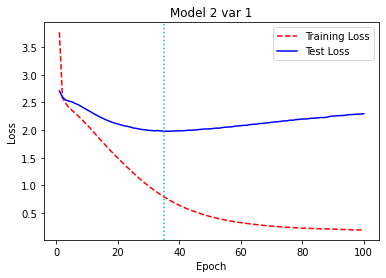

In [15]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
g_units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_2_1.h5'
history_save_file_name="cp_history_2_1.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_embed_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units, "softmax")
create_model(model,loss_func,learning_rate)
plot_model(model, to_file='model_images/cp_model_2_1_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model.history, 'loss_vs_epochs_images_100/cp_model_2_1_m.png', 'Model 2 var 1')

### Variant 2

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 32)             72704     
                                                                 
 gru_2 (GRU)                 (None, 64)                18816     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 8, 64)            0         
 or)                                                             
                                                                 
 gru_3 (GRU)                 (None, 8, 64)             24960     
                                                                 
 time_distributed_1 (TimeDis  (None, 8, 4510)          293150    
 tributed)                                                       
                                                                 


Epoch 37/100

Epoch 37: val_loss did not improve from 2.01791
125/125 - 10s - loss: 0.4711 - acc: 0.8644 - val_loss: 2.1555 - val_acc: 0.7204 - 10s/epoch - 84ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 2.01791
125/125 - 11s - loss: 0.4611 - acc: 0.8657 - val_loss: 2.1717 - val_acc: 0.7164 - 11s/epoch - 85ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 2.01791
125/125 - 11s - loss: 0.4514 - acc: 0.8670 - val_loss: 2.1768 - val_acc: 0.7181 - 11s/epoch - 87ms/step
Epoch 40/100

Epoch 40: val_loss did not improve from 2.01791
125/125 - 11s - loss: 0.4370 - acc: 0.8705 - val_loss: 2.1883 - val_acc: 0.7215 - 11s/epoch - 84ms/step
Epoch 41/100

Epoch 41: val_loss did not improve from 2.01791
125/125 - 10s - loss: 0.4320 - acc: 0.8715 - val_loss: 2.1963 - val_acc: 0.7181 - 10s/epoch - 84ms/step
Epoch 42/100

Epoch 42: val_loss did not improve from 2.01791
125/125 - 10s - loss: 0.4224 - acc: 0.8722 - val_loss: 2.1959 - val_acc: 0.7188 - 10s/epoch - 82ms/step
Epoc

125/125 - 13s - loss: 0.2748 - acc: 0.8960 - val_loss: 2.5194 - val_acc: 0.7133 - 13s/epoch - 100ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 2.01791
125/125 - 14s - loss: 0.2712 - acc: 0.8966 - val_loss: 2.5236 - val_acc: 0.7134 - 14s/epoch - 111ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 2.01791
125/125 - 14s - loss: 0.2675 - acc: 0.8977 - val_loss: 2.5289 - val_acc: 0.7107 - 14s/epoch - 112ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 2.01791
125/125 - 11s - loss: 0.2687 - acc: 0.8979 - val_loss: 2.5404 - val_acc: 0.7103 - 11s/epoch - 90ms/step
Epoch 90/100

Epoch 90: val_loss did not improve from 2.01791
125/125 - 11s - loss: 0.2706 - acc: 0.8966 - val_loss: 2.5304 - val_acc: 0.7122 - 11s/epoch - 85ms/step
Epoch 91/100

Epoch 91: val_loss did not improve from 2.01791
125/125 - 10s - loss: 0.2671 - acc: 0.8978 - val_loss: 2.5415 - val_acc: 0.7144 - 10s/epoch - 83ms/step
Epoch 92/100

Epoch 92: val_loss did not improve from 2.01791
1

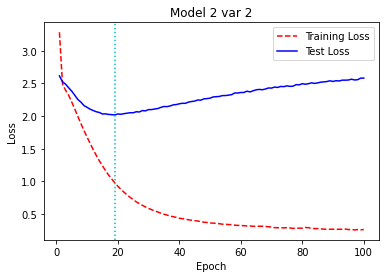

In [4]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 32
g_units = 64
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_2_2.h5'
history_save_file_name="cp_history_2_2.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model2_2 = define_embed_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units,"softmax")
create_model(model2_2,loss_func,learning_rate)
plot_model(model2_2, to_file='model_images/cp_model_2_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_2, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model2_2.history, 'loss_vs_epochs_images_100/cp_model_2_2_le.png', 'Model 2 var 2')

### Variant 3

In [ ]:
units = 64
g_units = 32
learning_rate = 0.005
batch_size=128
activation_function="sigmoid"

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 5, 64)             145408    
                                                                 
 gru_4 (GRU)                 (None, 32)                9408      
                                                                 
 repeat_vector_2 (RepeatVect  (None, 8, 32)            0         
 or)                                                             
                                                                 
 gru_5 (GRU)                 (None, 8, 32)             6336      
                                                                 
 time_distributed_2 (TimeDis  (None, 8, 4510)          148830    
 tributed)                                                       
                                                                 


63/63 - 12s - loss: 1.5971 - acc: 0.7079 - val_loss: 2.2296 - val_acc: 0.6846 - 12s/epoch - 189ms/step
Epoch 34/100

Epoch 34: val_loss improved from 2.22962 to 2.21130, saving model to Models100\cp_model_2_3.h5
63/63 - 11s - loss: 1.5664 - acc: 0.7109 - val_loss: 2.2113 - val_acc: 0.6880 - 11s/epoch - 181ms/step
Epoch 35/100

Epoch 35: val_loss did not improve from 2.21130
63/63 - 10s - loss: 1.5368 - acc: 0.7142 - val_loss: 2.2148 - val_acc: 0.6865 - 10s/epoch - 163ms/step
Epoch 36/100

Epoch 36: val_loss improved from 2.21130 to 2.20697, saving model to Models100\cp_model_2_3.h5
63/63 - 10s - loss: 1.5095 - acc: 0.7154 - val_loss: 2.2070 - val_acc: 0.6881 - 10s/epoch - 153ms/step
Epoch 37/100

Epoch 37: val_loss improved from 2.20697 to 2.20294, saving model to Models100\cp_model_2_3.h5
63/63 - 10s - loss: 1.4827 - acc: 0.7186 - val_loss: 2.2029 - val_acc: 0.6884 - 10s/epoch - 161ms/step
Epoch 38/100

Epoch 38: val_loss improved from 2.20294 to 2.19099, saving model to Models100\cp_

Epoch 80/100

Epoch 80: val_loss did not improve from 2.17110
63/63 - 10s - loss: 0.8902 - acc: 0.7944 - val_loss: 2.2209 - val_acc: 0.6980 - 10s/epoch - 161ms/step
Epoch 81/100

Epoch 81: val_loss did not improve from 2.17110
63/63 - 9s - loss: 0.8783 - acc: 0.7966 - val_loss: 2.2165 - val_acc: 0.7007 - 9s/epoch - 142ms/step
Epoch 82/100

Epoch 82: val_loss did not improve from 2.17110
63/63 - 9s - loss: 0.8684 - acc: 0.7985 - val_loss: 2.2136 - val_acc: 0.7014 - 9s/epoch - 143ms/step
Epoch 83/100

Epoch 83: val_loss did not improve from 2.17110
63/63 - 9s - loss: 0.8634 - acc: 0.7981 - val_loss: 2.2126 - val_acc: 0.7001 - 9s/epoch - 140ms/step
Epoch 84/100

Epoch 84: val_loss did not improve from 2.17110
63/63 - 9s - loss: 0.8573 - acc: 0.7985 - val_loss: 2.2158 - val_acc: 0.7003 - 9s/epoch - 140ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 2.17110
63/63 - 9s - loss: 0.8490 - acc: 0.7995 - val_loss: 2.2179 - val_acc: 0.7009 - 9s/epoch - 137ms/step
Epoch 86/100

Epoch 

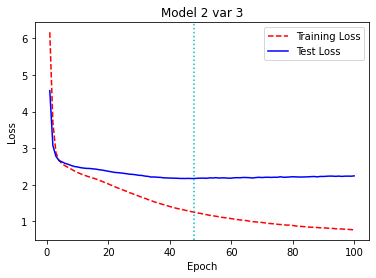

In [5]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 64
g_units=32
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=128
model_save_file_name='Models100/cp_model_2_3.h5'
history_save_file_name="cp_history_2_3.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model2_3 = define_embed_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units,"sigmoid")
create_model(model2_3,loss_func,learning_rate)
plot_model(model2_3, to_file='model_images/cp_model_2_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_3, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model2_3.history, 'loss_vs_epochs_images_100/cp_model_2_3_le.png', 'Model 2 var 3')

### View

Text(0, 0.5, 'LOSS')

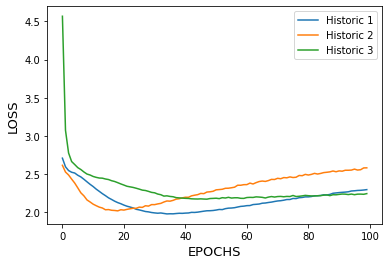

In [3]:
hist1 = load_history("History_100/cp_history_2_1.npy")
hist2 = load_history("History_100/cp_history_2_2.npy")
hist3 = load_history("History_100/cp_history_2_3.npy")
for x in ['val_loss']:
    plt.plot(hist1[x],label="Historic 1")
    plt.plot(hist2[x],label="Historic 2")
    plt.plot(hist3[x],label="Historic 3")
plt.legend()
plt.xlabel("EPOCHS",fontsize=13)
plt.ylabel("LOSS",fontsize=13)